# Peer to Peer Calculation

## Import library sympy, matplotlib, numpy

In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

## Set symbol for peer to peer formula

In [4]:
N, F, us, dmin = sp.symbols('N F U_s d_min')

## Display Symbols

In [5]:
display(N)

N

In [6]:
display(F)

F

In [7]:
display(us)

U_s

In [8]:
display(dmin)

d_min

## Display Formula

In [9]:
eq = N*F/us
eq2 = F/dmin
display(eq)
display(eq2)

F*N/U_s

F/d_min

## Create calculation method of eq formula

In [10]:
eq_lmbd = sp.lambdify((N,F,us),eq)

## Input argument in calculation method of eq formula

In [11]:
print(eq_lmbd(5,2,10))

1.0


## Generate N values, divide 

In [12]:
nilai_N = np.linspace(1,100,100)
print(nilai_N)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


## Run the calculation process using all N values in calculation method of eq formula

In [13]:
data_n = []
for n in nilai_N:
    data_n.append(eq_lmbd(n,2,10))
print(data_n)

[0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8, 11.0, 11.2, 11.4, 11.6, 11.8, 12.0, 12.2, 12.4, 12.6, 12.8, 13.0, 13.2, 13.4, 13.6, 13.8, 14.0, 14.2, 14.4, 14.6, 14.8, 15.0, 15.2, 15.4, 15.6, 15.8, 16.0, 16.2, 16.4, 16.6, 16.8, 17.0, 17.2, 17.4, 17.6, 17.8, 18.0, 18.2, 18.4, 18.6, 18.8, 19.0, 19.2, 19.4, 19.6, 19.8, 20.0]


## Visualize the graphic of the result of calculation process of Peer to Peer

Text(0, 0.5, '$N/(FU_s)$')

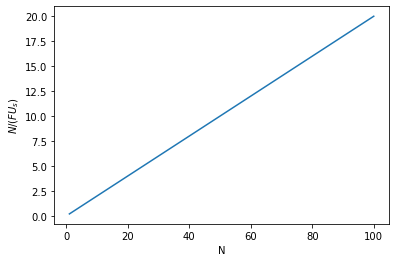

In [14]:
plt.plot(nilai_N, data_n)
plt.xlabel('N')
plt.ylabel('$N/(FU_s)$')

# Client to Server Calculation

## Set symbol for Client to Server Formula

In [16]:
N, F, us, dmin, ui = sp.symbols('N F U_s d_min U_i')

## Display symbols

In [17]:
display(N)

N

In [18]:
display(F)

F

In [19]:
display(us)

U_s

In [20]:
display(dmin)

d_min

In [21]:
display(ui)

U_i

In [22]:
eq = F/us
eq2 = F/dmin
eq3 = (N*F)/(us+ui)
display(eq)
display(eq2)
display(eq3)

F/U_s

F/d_min

F*N/(U_i + U_s)

## Create Calculation Method for eq, eq2, eq3 formulas

In [23]:
eq_lmbd = sp.lambdify((F,us),eq)
eq2_lmbd = sp.lambdify((F,dmin),eq2)
eq3_lmbd = sp.lambdify((N,F,us,ui),eq3)

## Display calculation result for eq, eq2, eq3 formulas

In [27]:
F_value = 15 * 1024
us_value = 30

print(eq_lmbd(F_value, us_value))

512.0


In [28]:
F_value = 15 * 1024
dmin_value = 2

print(eq2_lmbd(F_value, dmin_value))

7680.0


In [29]:
N_value = 10
F_value = 15 * 1024
us_value = 30
ui_value = 2

print(eq3_lmbd(N_value,F_value,us_value,ui_value))

4800.0


In [30]:
N_values = np.linspace(1,100,100)
print(nilai_N)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


In [32]:
ui_values = np.linspace(2,200,100)
print(ui_values)

[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110. 112.
 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138. 140.
 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166. 168.
 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194. 196.
 198. 200.]


In [1]:
data_n = []
data_n_temporary = []

F_value = 15 * 1024
us_value = 30
dmin_value = 2
